# Cifar Data Classification Using MultiLayer Perceptron

# Data Introduction

CIFAR-10 is a well-known dataset in the realm of computer vision and deep learning. It stands for "Canadian Institute For Advanced Research - 10," and it's often considered a benchmark dataset for image classification tasks. This dataset consists of 60,000 32x32 color images, categorized into ten different classes.

In [2]:
#importing Dependices

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load and preprocess the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize pixel values
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # One-hot encode labels

In [4]:
# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

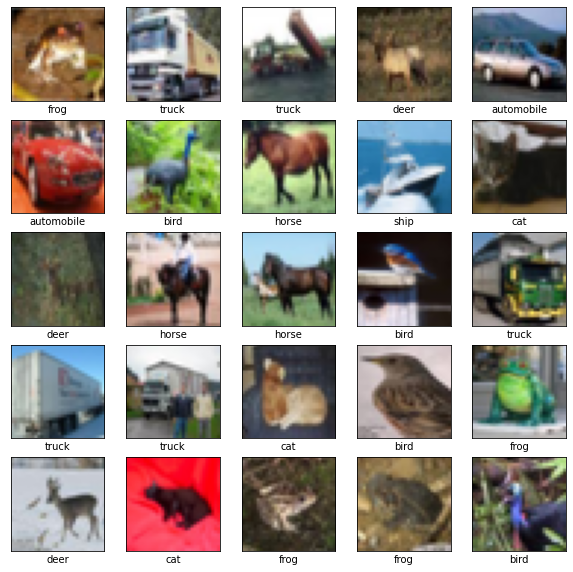

In [5]:
# Define a function to plot CIFAR-10 images
def plot_cifar_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[np.argmax(labels[i])])
    plt.show()

# Plot CIFAR-10 images
plot_cifar_images(x_train, y_train)

In [6]:
# Define the MLP model
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the 32x32x3 input images
    Dense(128, activation='relu'),     # Hidden layer with 128 units and ReLU activation
    Dense(64, activation='relu'),      # Hidden layer with 64 units and ReLU activation
    Dense(10, activation='softmax')    # Output layer with 10 units for CIFAR-10 classes
])


In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))



Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8708 - accuracy: 0.3240 - val_loss: 1.7060 - val_accuracy: 0.3834
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7005 - accuracy: 0.3916 - val_loss: 1.6593 - val_accuracy: 0.4099
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6428 - accuracy: 0.4150 - val_loss: 1.6377 - val_accuracy: 0.4230
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6051 - accuracy: 0.4279 - val_loss: 1.5896 - val_accuracy: 0.4320
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5755 - accuracy: 0.4350 - val_loss: 1.5756 - val_accuracy: 0.4336
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5549 - accuracy: 0.4434 - val_loss: 1.5751 - val_accuracy: 0.4359
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5373 - accuracy: 0.4492 - val_loss: 1.5732 - val_accuracy:

In [9]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 1ms/step - loss: 1.5448 - accuracy: 0.4530
Test accuracy: 0.453000009059906


In [11]:
# Make predictions on the test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 0s 820us/step


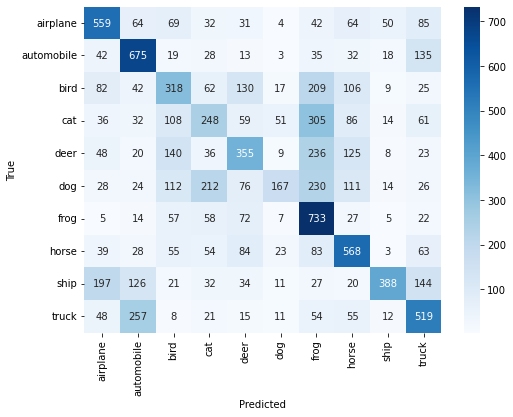

In [13]:
from sklearn.metrics import confusion_matrix, classification_report

# Plot a confusion matrix heatmap
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

              precision    recall  f1-score   support

    airplane       0.52      0.56      0.54      1000
  automobile       0.53      0.68      0.59      1000
        bird       0.35      0.32      0.33      1000
         cat       0.32      0.25      0.28      1000
        deer       0.41      0.35      0.38      1000
         dog       0.55      0.17      0.26      1000
        frog       0.38      0.73      0.50      1000
       horse       0.48      0.57      0.52      1000
        ship       0.74      0.39      0.51      1000
       truck       0.47      0.52      0.49      1000

    accuracy                           0.45     10000
   macro avg       0.47      0.45      0.44     10000
weighted avg       0.47      0.45      0.44     10000



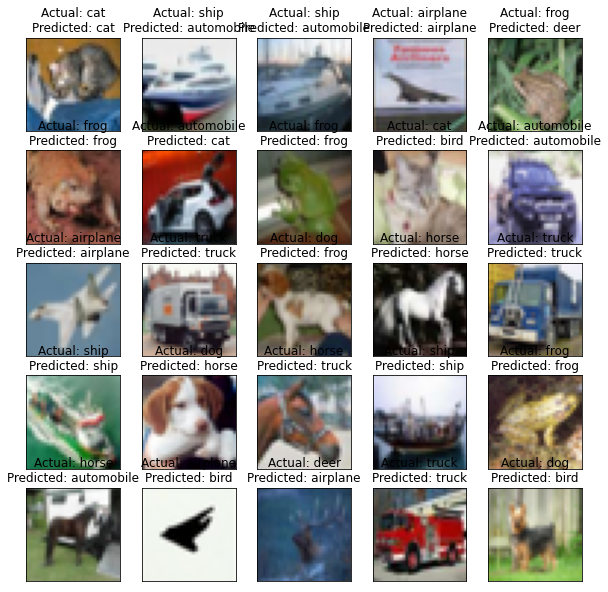

In [14]:
print(classification_report(y_true, y_pred_classes, target_names=class_names))

# Plot some images with predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    actual_label = class_names[y_true[i]]
    predicted_label = class_names[y_pred_classes[i]]
    title = f'Actual: {actual_label}\nPredicted: {predicted_label}'
    plt.title(title)
plt.show()

For classification of the cifar10 data set, we used a multilayer perceptron.After performing classification, we can see that our model did not perform well, with an accuracy of 45%.So, after predicting and plotting 25 images, only 12 were correctly predicted. As a result, we can conclude that Multi layer perceptron is not suitable for extracting features from images and classifying them.To overcome this and improve the predictability of our model, we can use CNN (convolutional neural networks), which work well for grid-like structures for capturing image features.